In [1]:
import time
import json
import cv2
import pandas as pd
from get_coordinate import Process
import re
import pytesseract
import os
import platform
import numpy as np

In [2]:
from matplotlib import pyplot as plt
def draw(img): #畫圖用的
    plt.figure(figsize=(10,8))
    plt.imshow(img,cmap = "gray")
    plt.show()

In [3]:
image = cv2.imread("ex.png")

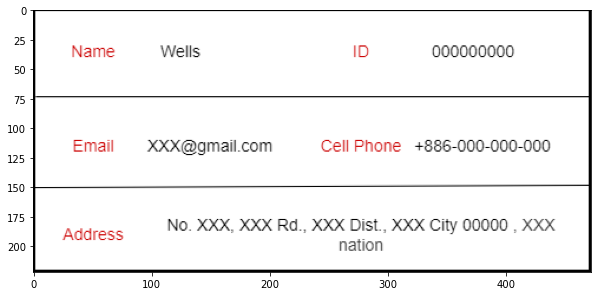

In [4]:
draw(image)

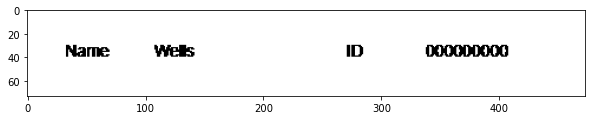

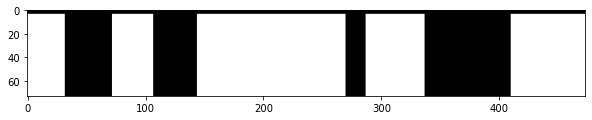

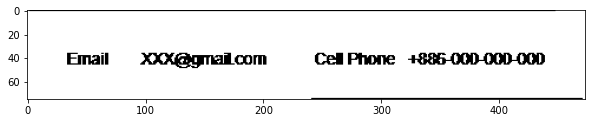

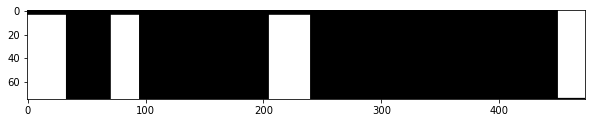

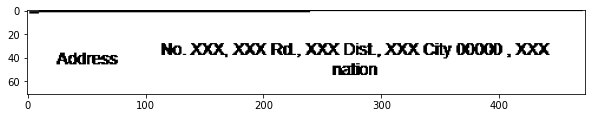

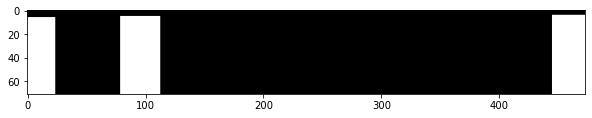

In [8]:
gray_img = image_process.to_gray(image_process.img_re_vline)
for i in image_process.y_coordinate(): #分割線座標
    start,end = i
    img_y_seg = gray_img[start:end]
    y_seg_erode = cv2.erode(img_y_seg,np.ones((int(len(img_y_seg[0])/100),int(len(img_y_seg[0])/100)), np.uint8))
    y_seg_open = cv2.morphologyEx(y_seg_erode,cv2.MORPH_OPEN,np.ones((int(len(img_y_seg[0])/5),int(len(img_y_seg[0])/30)), np.uint8))
    draw(img_y_seg)
    draw(y_seg_open)

In [5]:
image_process = Process(image)
img = image_process.img_re_vline  # 去除垂直隔線的原圖
img_cor = image_process.x_coordinate()  # title_content座標
img_g = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # 灰階二極化

In [6]:
if platform.system() is 'Windows':
    pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\wells\AppData\Local\Temp/ipykernel_1792/1405118132.py:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if platform.system() is 'Windows':


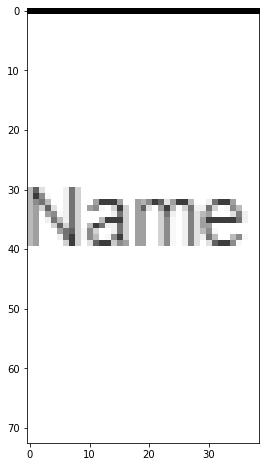

Name


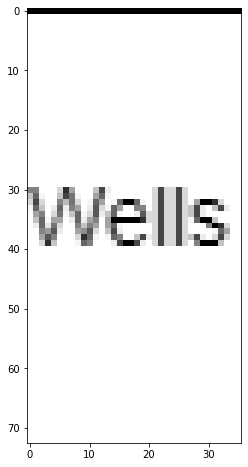

Wells


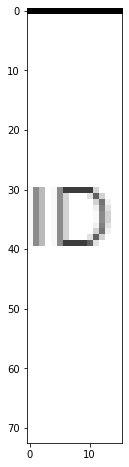

ID


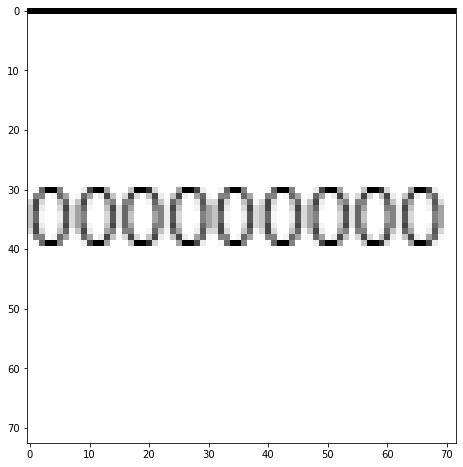

000000000


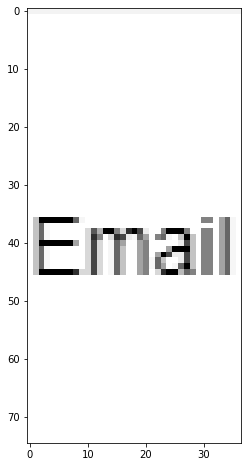

Email


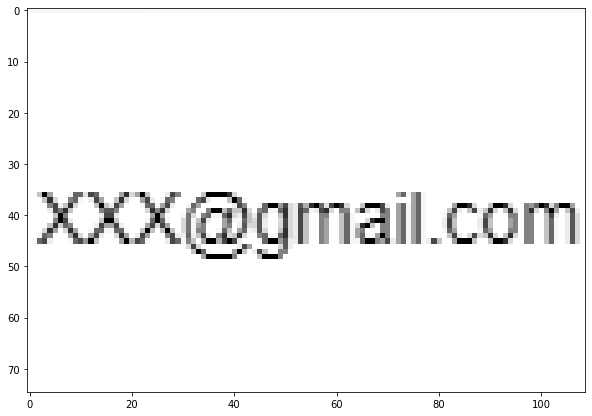

XXX@gmail.com


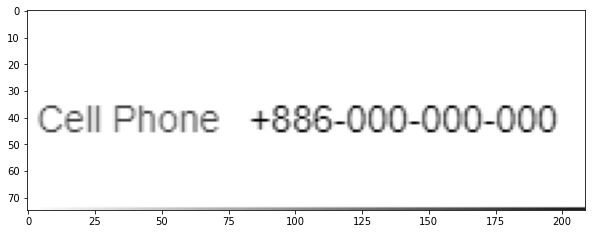

Cell Phone +886-000-000-000


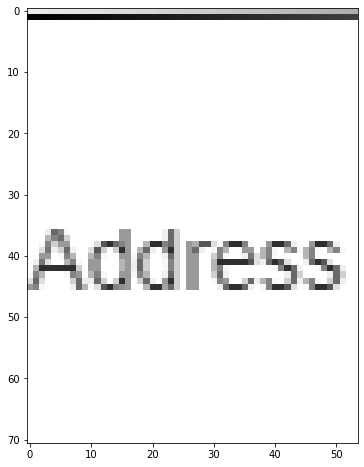

Address


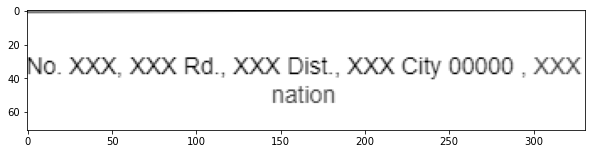

No. XXX, XXX Rd., XXX Dist., XXX City 00000 , XXX
nation


In [18]:
result = []
for each_line in img_cor:
    line_dict = {}
    for idx in range(0, len(each_line), 2):
        try:
            key, value = each_line[idx], each_line[idx+1]
        except:
            key, value = each_line[idx], None
#         draw(img_g[key[0]:key[1], key[2]:key[3]])
        iimg = cv2.resize(img_g[key[0]:key[1], key[2]:key[3]], dsize=None, fx=2, fy=2)
        key_word = pytesseract.image_to_string(iimg, config='--psm 3')
        key_word = key_word.lstrip(" !()-[]{};:'\",\\<>./?@\#$%^&*_~】").rstrip(" !(-[]{};:'\",\\<>./?@\#$%^&*_。\t\n\r\v\f")
#         print(key_word)
        if value is not None:
#             draw(img_g[value[0]:value[1], value[2]:value[3]])
            iimg = cv2.resize(img_g[value[0]:value[1], value[2]:value[3]], dsize=None, fx=2, fy=2)
            value_word = pytesseract.image_to_string(iimg, config='--psm 3')
            value_word = value_word.lstrip(" !()-[]{};:'\",\\<>./?@\#$%^&*_~】").rstrip(" !(-[]{};:'\",\\<>./?@\#$%^&*_。\t\n\r\v\f")
#             print(value_word)
        else:
            value_word = None
        line_dict[key_word] = value_word
    result.append(line_dict)

In [19]:
result

[{'Name': 'Wells', 'ID': '000000000'},
 {'Email': 'XXX@gmail.com', 'Cell Phone +886-000-000-000': None},
 {'Address': 'No. XXX, XXX Rd., XXX Dist., XXX City 00000 , XXX\nnation'}]